# Group Members

<b>Alex Zhou</b>

<b>Soo Han Im</b>

<b>Kevin Lim</b>

<b>Lena Antoine</b>


## Introduction and Background

   Consumers complain on a variety of products and services, and in the case of the United States, the type of complaint tends to skew towards the categories of debt collection, identity theft and imposter scams [1]. Moreover, the underlying factors pertaining to each complaint are not very easy to see. On the surface, it seems very difficult to predict what kind of complaints come from where, as we don't know what factors into what complaint. However, upon further research, we have uncovered articles that may help us get a glimpse of what lies underneath the surface. Blacks and Hispanics complain the most in the cases of fraud, and it is speculated that this is due to the lack of resources available to them to avoid being victims. It is also apparent that as the college educated population of a place increases, so too do the amount of consumer complaints [2]. Though this gives us a good starting line, there's still much to uncover as to what leads up to a complaint, and what can be done to reduce them.

In order to obtain better insight into the characteristics of consumers and the nature of their complaints, we will be comparing the average income and education of individual states to their top three consumer complaints to gain better comprehension on how such factors relate to one another. 

[1]<b> https://www.ftc.gov/news-events/press-releases/2016/03/ftc-releases-annual-summary-consumer-complaints </b>

[2]<b> https://www.ftc.gov/system/files/documents/public_events/966823/raval_whatdeterminesconsumercomplainingbehavior_0.pdf
</b>

<b>Research Question: </b>
- Does a state's average income or education factor into the amount and type of customer complaints made in that state?

<b>Hypothesis: </b>

   We believe that the higher the average state education or state income, the lower the amount of customer complaints. This would be because if you have a higher education, you are less likely to misuse a product and complain about it. If you have a higher income, you'd be less critical about your products (and the money that goes into those products), and thus less likely to complain.
   
   We also believe that the type of consumer complaint will be significantly affected by income and education, particularly in terms of debt collection and mortgage complaints lowering significantly as average state education and income increases.

<b>Method: </b>

   In order to test our hypothesis, we will be taking the high school graduation rate of all 50 states, along with the average income, and correlating them to the ratio of complaints to population per state to see if we find a significant correlation of some sort. Also, we will be looking for the top 3 types of complaints per state and comparing graduation rate and average income to that as well, to see if income or education is a factor in deciding complaint type.

## Data Description

**Dataset:** US Average state income
* **Link:** 
* **# of Observations**: 53, but we will only be using 51 (every state + DC)
* **Description**: A table that contains the average income per person for each state in the US for the past 5 years. We will only be using the most recent year, 2015.

**Dataset:** US Average education rate
* **Link:** https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment
* **# of Observations**: 53, but we will only be using 51 (every state + DC)
* **Description**: A table that contains the rates of high school graduation, bachelor's degree, and advanced degrees. We will only be using high school graduation rate, as we believe it best represents the average education of a state.

**Dataset:** US Population per state
* **Link:** https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population
* **# of Observations**: 63, but we will only be using 51 (every state + DC)

**Dataset:** US Consumer Complaints database
* **Link:** https://catalog.data.gov/dataset/consumer-complaint-database#topic=consumer_navigation
* **# of Observations**</b>: 965268
* **Description**: A spreadsheet with every consumer complaint made in the US, including multiple details per complaint. Comes from the FCC’s 2015 Annual Summary of Consumer Complaints. 


## Data Cleaning and Preprocessing

In the following section, we will be importing our resources and data, and doing some cleaning on the data before pre-processing it for analysis.

We first parsed the information from the wikipedia tables and placed them in their own dataframes whilst importing our consumer complaints.

In [1]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import requests
import bs4
from bs4 import BeautifulSoup
from pandas.plotting import scatter_matrix

In [2]:
# Import our csv file
df_complaints = pd.read_csv('Consumer_Complaints.csv')

# Request data from the two wiki pages we have
page_income = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_by_income')
soup_income = BeautifulSoup(page_income.content, 'html.parser')

page_education = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_by_educational_attainment')
soup_education = BeautifulSoup(page_education.content, 'html.parser')

page_population = requests.get('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population')
soup_population = BeautifulSoup(page_population.content, 'html.parser')

# Properly place all the wiki page data into tables
table_income = soup_income.find("table", {"class": "wikitable sortable"})
table_education = soup_education.find("table", {"class": "wikitable sortable"})
table_population = soup_population.find("table", {"class": "wikitable sortable"})

# Extract the table data into lists
income_a, income_b = [], []
edu_a, edu_b, edu_c, edu_d, edu_e, edu_f, edu_g = [], [], [], [], [], [], []
pop_a, pop_b = [], []
sum = 0

for row in table_income.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 7:
        continue
    try:
        income_a.append(cells[1].find('a').text)
        income_b.append(cells[2].find(text=True))
    except:
        break
        
for row in table_education.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 7:
        continue
    try:
        edu_a.append(cells[0].find('a').text)
        edu_b.append(cells[1].find(text=True))
        edu_c.append(cells[2].find(text=True))
        edu_d.append(cells[3].find(text=True))
        edu_e.append(cells[4].find(text=True))
        edu_f.append(cells[5].find(text=True))
        edu_g.append(cells[6].find(text=True))
    except:
        break
        
for row in table_population.findAll('tr'):
    
    cells = row.findAll('td')
    if len(cells) != 9:
        continue
    try:
        pop_a.append(cells[2].find('a').text)
        pop_b.append(cells[3].find(text=True))
    except:
        break
        

# Put our web-scraped data into datasets
df_income = pd.DataFrame(
    {'State': income_a,
     'Average Income': income_b,
    })

df_education = pd.DataFrame(
    {'State': edu_a,
     'HS grad %': edu_b,
     'HS grad ranking': edu_c,
     'Bachelor %': edu_d,
     'Bachelor rank': edu_e,
     'Advanced %': edu_f,
     'Advanced rank': edu_g
    })

df_population = pd.DataFrame(
    {'State': pop_a,
     'Population': pop_b
    })

### Standardizing States

Our data from the csv file used state abbreviations. Because it was much easier to abbreviate 150 rows in each of the wikipedia tables instead of over 900000 rows in our csv file, we decided to standardize the state names to be abbreviations.

In [3]:
# Method to convert all states to their abbreviations
def abbreviate_state(str_in):
    if(str_in == 'Alabama'):
        return 'AL'
    elif(str_in == 'Alaska'):
        return 'AK'
    elif(str_in == 'Arizona'):
        return 'AZ'
    elif(str_in == 'Arkansas'):
        return 'AR'
    elif(str_in == 'California'):
        return 'CA'
    elif(str_in == 'Colorado'):
        return 'CO'
    elif(str_in == 'Connecticut'):
        return 'CT'
    elif(str_in == 'Delaware'):
        return 'DE'
    elif(str_in == 'Florida'):
        return 'FL'
    elif(str_in == 'Georgia'):
        return 'GA'
    elif(str_in == 'Hawaii'):
        return 'HI'
    elif(str_in == 'Idaho'):
        return 'ID'
    elif(str_in == 'Illinois'):
        return 'IL'
    elif(str_in == 'Indiana'):
        return 'IN'
    elif(str_in == 'Iowa'):
        return 'IA'
    elif(str_in == 'Kansas'):
        return 'KS'
    elif(str_in == 'Kentucky'):
        return 'KY'
    elif(str_in == 'Louisiana'):
        return 'LA'
    elif(str_in == 'Maine'):
        return 'ME'
    elif(str_in == 'Maryland'):
        return 'MD'
    elif(str_in == 'Massachusetts'):
        return 'MA'
    elif(str_in == 'Michigan'):
        return 'MI'
    elif(str_in == 'Minnesota'):
        return 'MN'
    elif(str_in == 'Mississippi'):
        return 'MS'
    elif(str_in == 'Missouri'):
        return 'MO'
    elif(str_in == 'Montana'):
        return 'MT'
    elif(str_in == 'Nebraska'):
        return 'NE'
    elif(str_in == 'Nevada'):
        return 'NV'
    elif(str_in == 'New Hampshire'):
        return 'NH'
    elif(str_in == 'New Jersey'):
        return 'NJ'
    elif(str_in == 'New Mexico'):
        return 'NM'
    elif(str_in == 'New York'):
        return 'NY'
    elif(str_in == 'North Carolina'):
        return 'NC'
    elif(str_in == 'North Dakota'):
        return 'ND'
    elif(str_in == 'Ohio'):
        return 'OH'
    elif(str_in == 'Oklahoma'):
        return 'OK'
    elif(str_in == 'Oregon'):
        return 'OR'
    elif(str_in == 'Pennsylvania'):
        return 'PA'
    elif(str_in == 'Rhode Island'):
        return 'RI'
    elif(str_in == 'South Carolina'):
        return 'SC'
    elif(str_in == 'South Dakota'):
        return 'SD'
    elif(str_in == 'Tennessee'):
        return 'TN'
    elif(str_in == 'Texas'):
        return 'TX'
    elif(str_in == 'Utah'):
        return 'UT'
    elif(str_in == 'Vermont'):
        return 'VT'
    elif(str_in == 'Virginia'):
        return 'VA'
    elif(str_in == 'Washington'):
        return 'WA'
    elif(str_in == 'West Virginia'):
        return 'WV'
    elif(str_in == 'Wisconsin'):
        return 'WI'
    elif(str_in == 'Wyoming'):
        return 'WY'
    elif(str_in == 'District of Columbia'):
        return 'DC'
    else:
        return 'NONE'

### Removing unwanted data and preserving privacy

Here we move unnecessary rows from the dataframes (like Puerto Rico and other territories). We also set the state to be the index for all 3 state dataframes after standardizing the state name. Moving on to the complaints dataframe, we first drop any rows that don't have a state. Next, we drop columns that could be potential privacy issues, like Zip Code and Company. Finally, we drop any remaining columns that won't assist with our project.

In [4]:
# Here we clean the income, education, and population dataframes
# Abbreviate all states in our education and income dataframes to match complaints dataframe
df_education['State'] = df_education['State'].apply(abbreviate_state)
df_income['State'] = df_income['State'].apply(abbreviate_state)
df_population['State'] = df_population['State'].apply(abbreviate_state)

# Set state as index
df_education.set_index('State', inplace=True)
df_income.set_index('State', inplace=True)
df_population.set_index('State', inplace=True)

# Remove non-states
df_education.drop('NONE', inplace=True)
df_income.drop('NONE',  inplace=True)
df_population.drop('NONE', inplace=True)

df_education.head(5)

,Advanced %,Advanced rank,Bachelor %,Bachelor rank,HS grad %,HS grad ranking
State,,,,,,
MT,9.5%,32,29.5%,20,91.8%,1
MN,11.2%,17,33.7%,10,92.4%,2
WY,8.6%,40,25.7%,40,92.3%,3
AK,10.1%,27,28.0%,26,92.1%,4
NH,13.0%,9,34.9%,8,92.0%,5


In [5]:
# Here we clean the complaints dataframe
# Remove columns that have no state in the complaints dataframe
df_complaints.dropna(subset = ['State'], inplace=True)

# First we should get rid of any privacy issues
df_complaints.drop(['ZIP code', 'Company'], axis=1, inplace=True)

# Next we should get rid of any columns we don't need
df_complaints.drop(['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Tags',
                    'Consumer consent provided?', 'Complaint ID'], axis=1, inplace=True)

# Finally, we get rid of any states we're not looking at
df_complaints = df_complaints[df_complaints.State != 'MP']
df_complaints = df_complaints[df_complaints.State != 'PR']
df_complaints = df_complaints[df_complaints.State != 'PW']
df_complaints = df_complaints[df_complaints.State != 'AS']
df_complaints = df_complaints[df_complaints.State != 'FM']
df_complaints = df_complaints[df_complaints.State != 'GU']
df_complaints = df_complaints[df_complaints.State != 'AE']
df_complaints = df_complaints[df_complaints.State != 'AA']
df_complaints = df_complaints[df_complaints.State != 'MH']
df_complaints = df_complaints[df_complaints.State != 'AP']
df_complaints = df_complaints[df_complaints.State != 'VI']

# Reset the index
df_complaints.reset_index(inplace=True)
df_complaints.drop('index', axis=1, inplace=True)

df_complaints.head(5)

,Date received,Product,Issue,Company public response,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,03/12/2014,Mortgage,"Loan modification,collection,foreclosure",NaN,MI,Referral,03/17/2014,Closed with explanation,Yes,No
1,10/01/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,AL,Web,10/05/2016,Closed with explanation,Yes,No
2,10/17/2016,Consumer Loan,Managing the loan or lease,NaN,PA,Web,10/20/2016,Closed with explanation,Yes,No
3,06/08/2014,Credit card,Bankruptcy,NaN,ID,Web,06/10/2014,Closed with explanation,Yes,Yes
4,09/13/2014,Debt collection,Communication tactics,NaN,VA,Web,09/13/2014,Closed with explanation,Yes,Yes


### Counting complaints

Here, we do the heavy work. We go through the rows in our complaints and count how many complaints are for each state, placing them in a dictionary. At the same time, we simplify the products column, since there's a lot of repetition in what types of products there are, and simplifying and categorizing them will assist with analysis.

In [6]:
# Create a list of state abbreviations to be used later
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
          'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
          'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
          'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
          'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'DC']

# Count the number of complaints per state, also clean data so that products column is cleaner
complaints_per_state = {}
num_complaints = {}
for index, row in df_complaints.iterrows():
    key = df_complaints.iloc[index]['State']
    
    # Count complaints
    if key in complaints_per_state:
        complaints_per_state[key] += 1
    else:
        complaints_per_state[key] = 1
        
    product = df_complaints.iloc[index]['Product']
    # Simplify/clean products column
    if 'report' in product:
        df_complaints.iloc[index]['Product'] = 'Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports'
    elif 'card' in product:
        df_complaints.iloc[index]['Product'] = 'Credit Card or Prepaid Card'
    elif 'Payday' in product:
        df_complaints.iloc[index]['Product'] = 'Payday Loan, Title Loan, or Personal Loan'
    elif 'Money' in product:
        df_complaints.iloc[index]['Product'] = 'Money Transfer, Virtual Currency, or Money Service'
    elif 'Virtual' in product:
        df_complaints.iloc[index]['Product'] = 'Money Transfer, Virtual Currency, or Money Service'
    elif 'Bank' in product:
        df_complaints.iloc[index]['Product'] = 'Bank account or Services'
    elif 'Checking' in product:
        df_complaints.iloc[index]['Product'] = 'Bank account or Services'

### Calculating complaints to population

Simply counting complaints isn't enough, since a state with a higher population will obviously get more complaints. Instead, we calculate the ratio of complaints per person in each state here. Then we find the top 3 complaint types per state.

In [7]:
# Calculate complaints per population
complaints_percent = {}
for state in states:
    temp = float(complaints_per_state[state]) / float(df_population.loc[state]['Population'].replace(',',''))
    temp *= 100
    temp = str(temp)[0:4] + "%"
    complaints_percent[state] = temp

In [8]:
# Find the top 3 issues of complaint per state
state_issues = {}
num_issues = {}
for state in states:
    issue1 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[0]
    issue2 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[1]
    issue3 = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts().index[2]
    
    num_issue = df_complaints.loc[df_complaints['State'] == state]['Product'].value_counts()
    num1 = str(num_issue.iloc[0] / num_issue.sum())[:5]
    num2 = str(num_issue.iloc[1] / num_issue.sum())[:5]
    num3 = str(num_issue.iloc[2] / num_issue.sum())[:5]

    issues = "1. " + issue1 + " 2. "  + issue2 + " 3. " + issue3
    nums = num1 + ", " + num2 + ", " + num3
    state_issues[state] = issues
    num_issues[state] = nums

In [9]:
# Results Compiled from Dataframes

df_results = pd.DataFrame([complaints_per_state, state_issues,num_issues,complaints_percent]).T
df_results.columns = ['# of Complaints', 'Top 3 Issues', 'Issue %', '% of Complaints']
df_results['Avg Income'] = df_income['Average Income']
df_results['Population'] = df_population['Population']
df_results['HS Grad Rate'] = df_education['HS grad %']
df_results = df_results[['% of Complaints', 'Avg Income', 'HS Grad Rate', 'Top 3 Issues', 'Issue %', '# of Complaints', 'Population']]
df_results.index.nunique()

51

## Data Visualization

[Text(0,0.5,'Product Issue Counts'),
 Text(0.5,0,'Product Issues'),
 Text(0.5,1,'Total Counts of Issues Across All 50 States')]

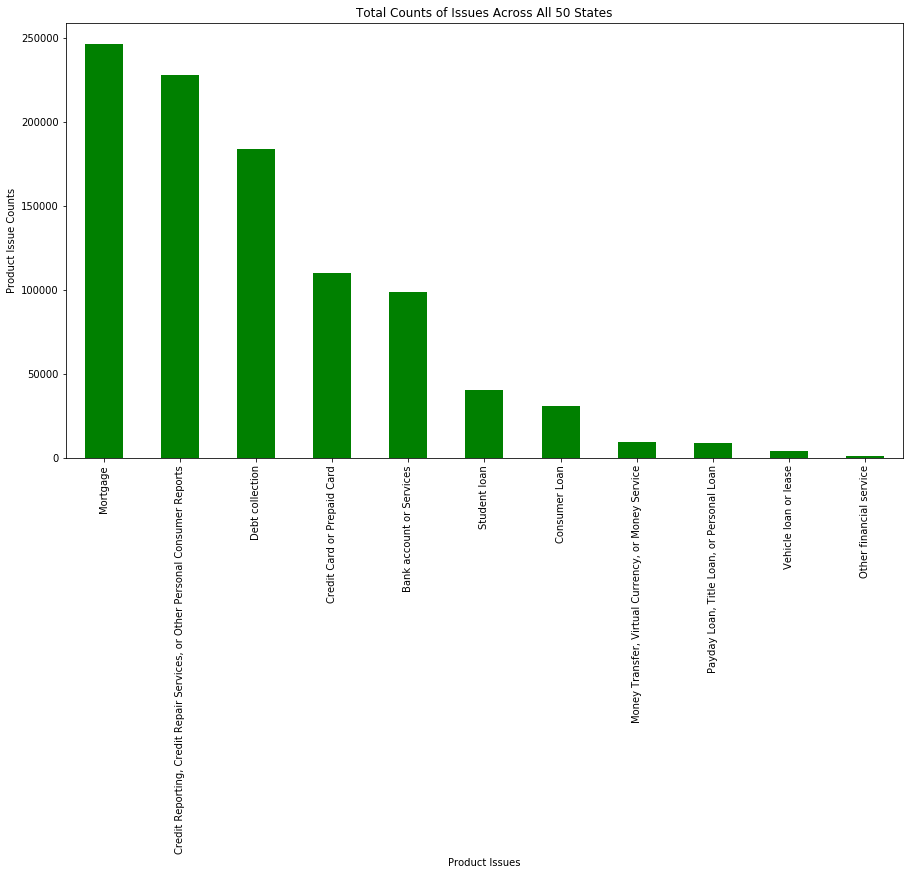

In [10]:
# Bar Plot of Total Counts of Issues Across All 50 States

axes = df_complaints.Product.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(xlabel="Product Issues", ylabel="Product Issue Counts", title="Total Counts of Issues Across All 50 States")

### Figure 1: Top Complaint Types (All figures are above the labels)
This figure shows us a count of the top consumer complaint issues across 50 states. We can see that among the top 3 are mortgages, credit-related issues, and debt collection. We will be focusing on these 3 types of complaints.

[Text(0,0.5,'Product Issue Counts'),
 Text(0.5,0,'Product Issues'),
 Text(0.5,1,'Total Counts of Issues in California')]

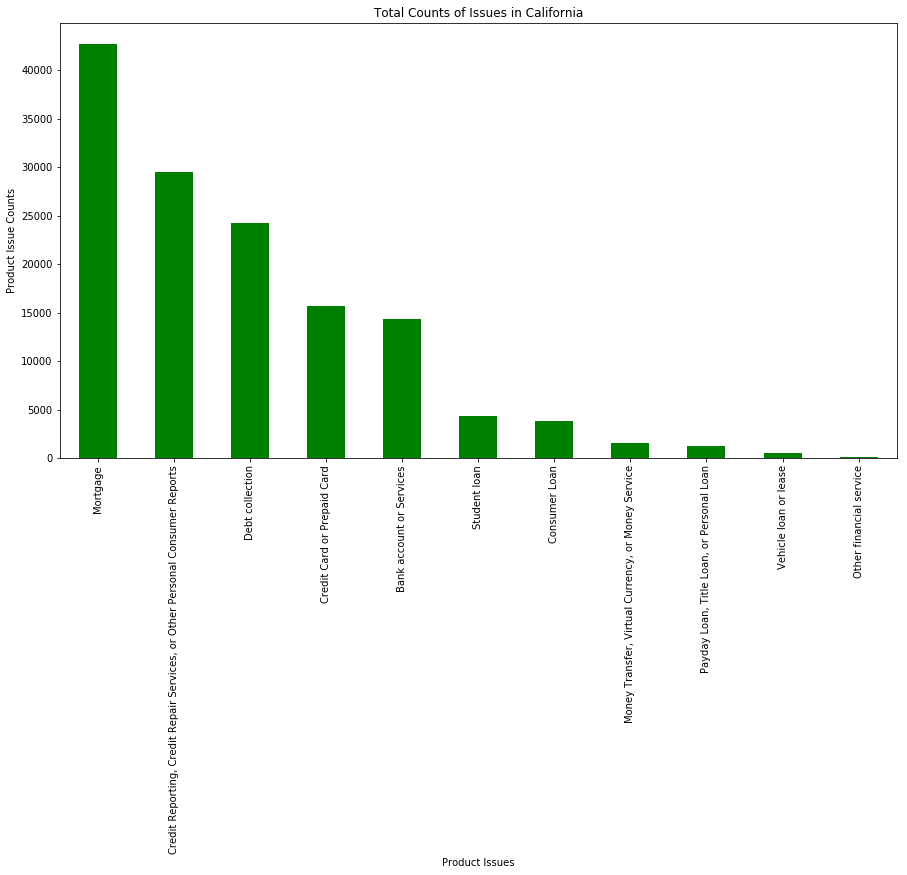

In [11]:
# Total Complaints in California, as an example

df_calif = df_complaints.copy()
df_calif.sort_values(by=['State'], inplace=True)
df_calif.set_index(keys=['State'], drop=False,inplace=True)
df_calif = df_calif.loc[df_calif.State=='CA']

axes = df_calif.Product.value_counts().plot.bar(figsize=(15, 8), color="green")
axes.set(xlabel="Product Issues", ylabel="Product Issue Counts", title="Total Counts of Issues in California")

### Figure 2: Top Complaint Types in California
We'll compare this figure to figure 1 and get a rough idea of how accurately this average matches per state. We find that at least for California, the graph matches pretty well, so it should be fair to say that all states are more or less similar to the total counts graph.

[Text(0,0.5,'Ratio of complaints that are mortgage-related'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Ratio of Mortgage issues to all issues per state')]

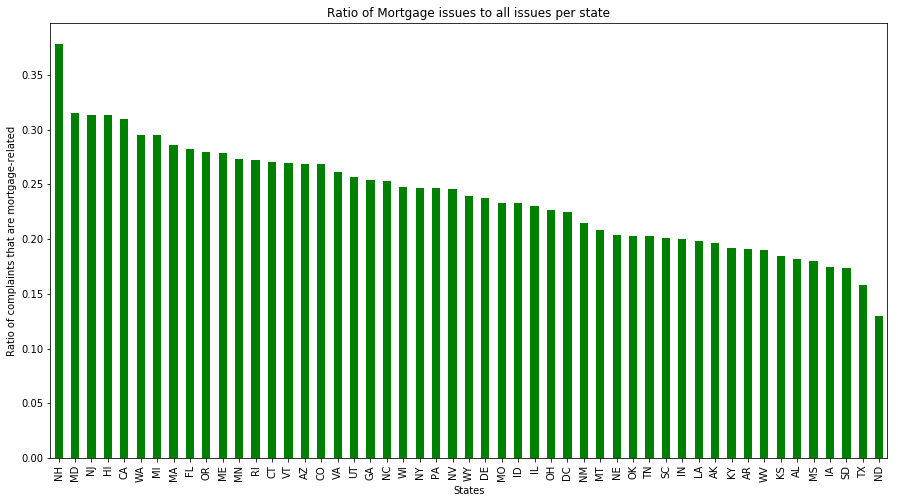

In [12]:
# Bar Plot of Mortgage Issues per State
def divide_by_pop(state, count):
    return count / complaints_per_state[state]

df_mortgage = df_complaints.copy()
df_mortgage.sort_values(by=['Product'], inplace=True)
df_mortgage.set_index(keys=['Product'], drop=False,inplace=True)
df_mortgage = df_mortgage.loc[df_mortgage.Product=='Mortgage']
mortgage_counts = df_mortgage.State.value_counts()

for index, value in mortgage_counts.iteritems():
    if(index in complaints_per_state.keys()):
        mortgage_counts.loc[index]= divide_by_pop(index, value)
        
mortgage_counts.sort_values(inplace=True, ascending=False)

axes = mortgage_counts.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Ratio of complaints that are mortgage-related", xlabel="States", title="Ratio of Mortgage issues to all issues per state")

### Figure 3: Mortgage Complaints in States
Mortgage issues were the top issue in general by a decent margin. We will now look at graphs of the top 3 issue, separated by state. We made sure to graph these based on what ratio of all complaints made by the state were this particular issue, rather than just taking the count (that would put too much emphasis on population!)

[Text(0,0.5,'Ratio of complaints that are credit-related'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Ratio of credit issues to all issues per state')]

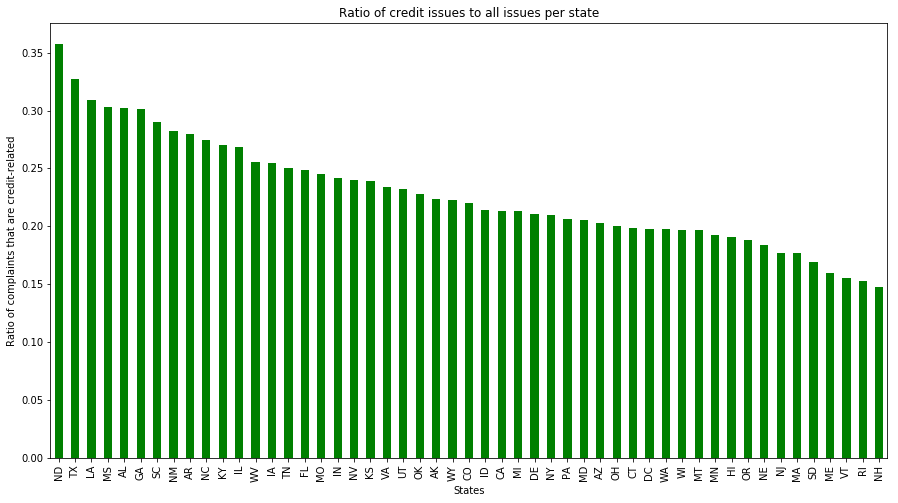

In [13]:
# Bar Plot of Credit-Related Issues per State

df_credit = df_complaints.copy()
df_credit.sort_values(by=['Product'], inplace=True)
df_credit.set_index(keys=['Product'], drop=False,inplace=True)
df_credit = df_credit.loc[df_credit.Product=='Credit Reporting, Credit Repair Services, or Other Personal Consumer Reports']
credit_counts = df_credit.State.value_counts()

for index, value in credit_counts.iteritems():
    if(index in complaints_per_state.keys()):
        credit_counts.loc[index]= divide_by_pop(index, value)
        
credit_counts.sort_values(inplace=True, ascending=False)

axes = credit_counts.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Ratio of complaints that are credit-related", xlabel="States", title="Ratio of credit issues to all issues per state")

### Figure 4: Credit Complaints in States
The second top issue was credit-related issues.

[Text(0,0.5,'Ratio of complaints that are debt-related'),
 Text(0.5,0,'States'),
 Text(0.5,1,'Ratio of debt issues to all issues per state')]

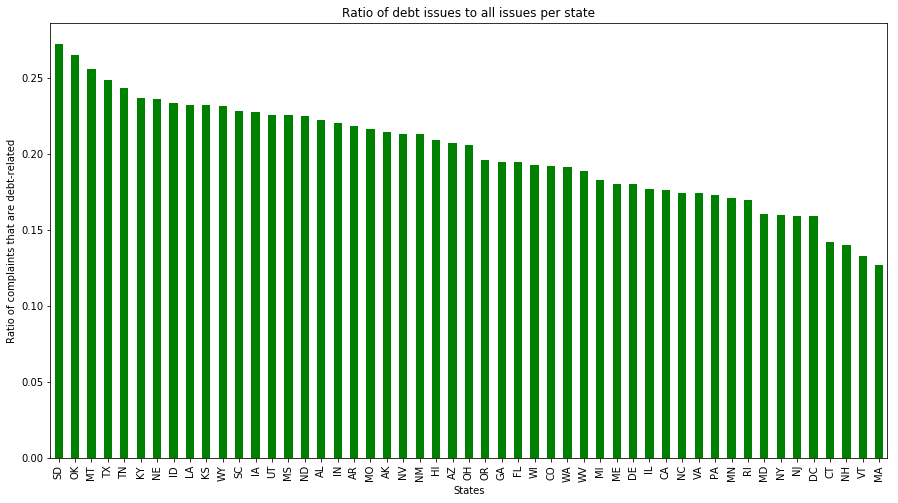

In [14]:
# Bar Plot of Debt Collection Issues per State

df_debt = df_complaints.copy()
df_debt.sort_values(by=['Product'], inplace=True)
df_debt.set_index(keys=['Product'], drop=False,inplace=True)
df_debt = df_debt.loc[df_debt.Product=='Debt collection']
debt_counts = df_debt.State.value_counts()

for index, value in debt_counts.iteritems():
    if(index in complaints_per_state.keys()):
        debt_counts.loc[index]= divide_by_pop(index, value)
        
debt_counts.sort_values(inplace=True, ascending=False)

axes = debt_counts.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="Ratio of complaints that are debt-related", xlabel="States", title="Ratio of debt issues to all issues per state")

### Figure 5: Debt Complaints in States
Our third top issue is debt.

In [15]:
# Helper Method to Convert Strings to Integers
def convert_to_float(number):
    if ',' in number:
        number = number.replace(',', '')
        
    if '$' in number:
        number = number.replace('$', '')
        
    if '%' in number:
        number = number.replace('%', '')
    
    return float(number)

[Text(0,0.5,'% of Population that made complaints'),
 Text(0.5,0,'States'),
 Text(0.5,1,'% of Population that made complaints')]

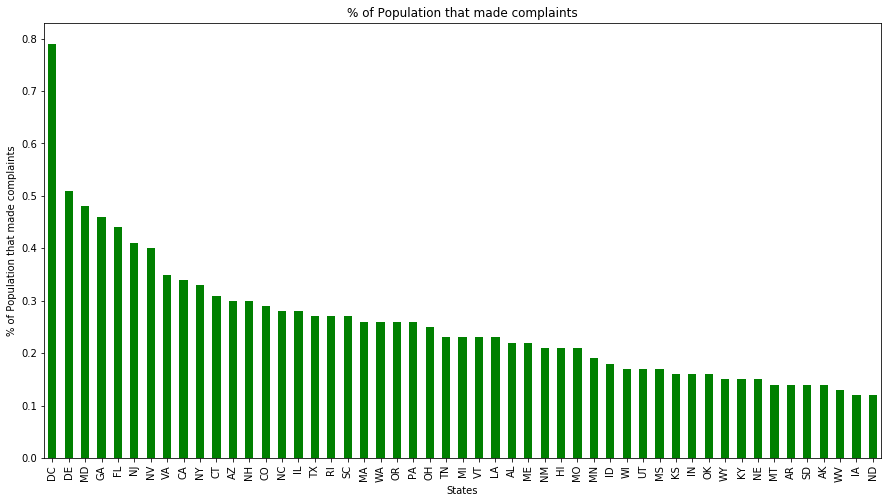

In [16]:
# Bar Plot of Complaints / Overall Population per State States

df_pcomp = df_results["% of Complaints"]
df_pcomp = df_pcomp.apply(convert_to_float)
df_pcomp = df_pcomp.sort_values(ascending=False)
axes = df_pcomp.plot.bar(figsize=(15, 8), color="green")
axes.set(ylabel="% of Population that made complaints", xlabel="States", title="% of Population that made complaints")

### Figure 6: % of the population that made complaints
To get a bit of a benchmark, we graph here what percentage of the population has made complaints. For example, North Dakota has the least complaints per person at a rate of approximately 0.15% of the population. It becomes clear here that population has almost no correlation in how many consumer complaints are made, as California is not the top state here.

In [17]:
# Helper Method to Converting a Decimal into a Percent

def convert_to_percent(number):
    if '%' in number:
        number = number.replace('%', '')
    
    number = float(number)
    return number

In [18]:
# Converting String Values to Something we can Plot

df_sm = df_results[["Avg Income", "HS Grad Rate", "# of Complaints", "Population", "% of Complaints"]]
df_sm.is_copy = None
df_sm["% of Complaints"] = df_sm["% of Complaints"].apply(convert_to_percent)
df_sm["Avg Income"] = df_sm["Avg Income"].apply(convert_to_float)
df_sm["HS Grad Rate"] = df_sm["HS Grad Rate"].apply(convert_to_float)
df_sm["Population"] = df_sm["Population"].apply(convert_to_float)

df_sm.head(10)

,Avg Income,HS Grad Rate,# of Complaints,Population,% of Complaints
AK,73355.0,92.1,1086,739795.0,0.14
AL,44765.0,84.3,10824,4874747.0,0.22
AR,41995.0,84.8,4467,3004279.0,0.14
AZ,51492.0,86.0,21447,7016270.0,0.30
CA,64500.0,79.8,137907,39536653.0,0.34
CO,63909.0,90.7,16474,5607154.0,0.29
CT,71346.0,89.9,11294,3588184.0,0.31
DC,75628.0,89.3,5499,693972.0,0.79
DE,61255.0,88.4,4915,961939.0,0.51
FL,49426.0,86.9,93265,20984400.0,0.44


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d988710>,
      dtype=object)

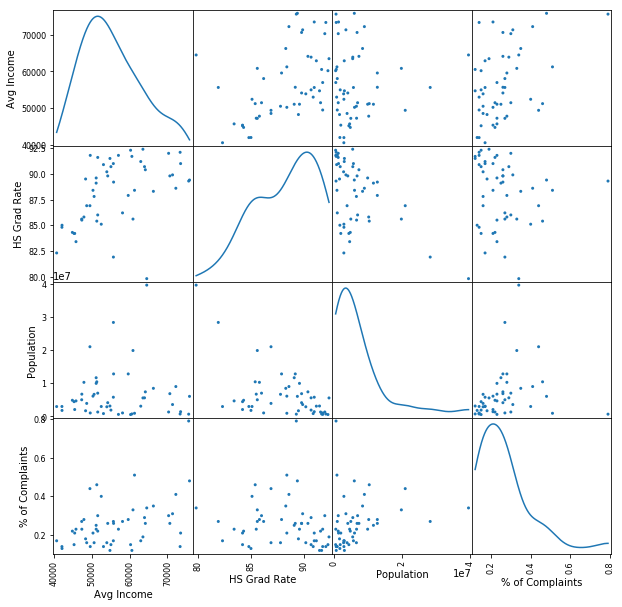

In [19]:
# Scatter Matrix Plot

scatter_matrix(df_sm, alpha=1, figsize=(10, 10), diagonal='kde')

### Figure 7: Scatter Matrix of all data
This is where we can really begin to see the fruits of our labor. In this scatter plot, % of complaints represents the approximate percentage of a population that has made complaints.

Here, a scatter plot matrix compares highschool graduate rates, the population, average income and percent of complaints of each state. There's plenty that interests us here, specifically comparing % of Complaints to all other columns. We can see that there is actually not too much correlation between average income or high school graduation rate. We can see at least a weak positive correlation between average income and % of complaints, but there's a lot of spread as well. High school graduation rate seems too varied to offer much insight.

However, we should not make our conclusion just yet. Let's see what a correlation matrix tells us.

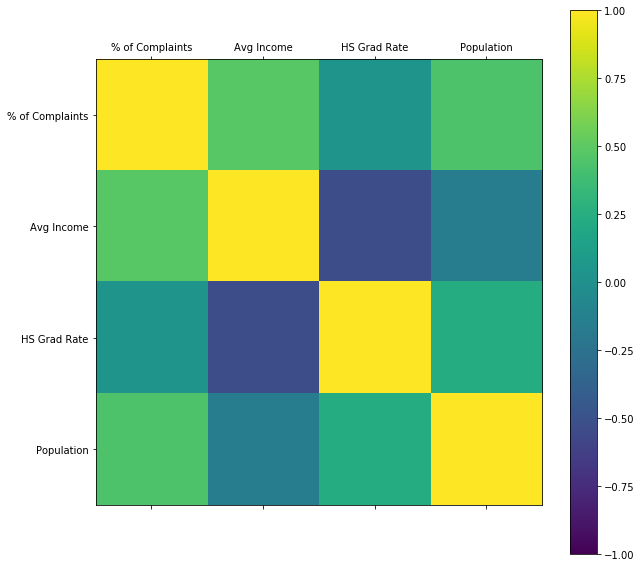

,Avg Income,HS Grad Rate,Population,% of Complaints
Avg Income,1.000000,0.479372,0.037928,0.438055
HS Grad Rate,0.479372,1.000000,-0.525405,-0.154403
Population,0.037928,-0.525405,1.000000,0.237143
% of Complaints,0.438055,-0.154403,0.237143,1.000000


In [20]:
# Correlation Matrix Overall

# Define correlations and columns
correlations_all = df_sm.corr()
columns_all = ['% of Complaints', 'Avg Income', 'HS Grad Rate', 'Population']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations_all, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_all)
ax.set_yticklabels(columns_all)
plt.show()
correlations_all

### Figure 8: Correlation Matrix of All Data
Though we were unable to pick out much before, we can now see that average income actually has a moderately positive correlation to the % of complaints, despite it being widely spread. However, as we saw in the scatter plot before, high school graduation rate has a very minimal effect on the % of complaints made.

In [21]:
# Correlation Matrix for Mortgage Issues

# Preparation of Dataframe
df_im = df_mortgage.copy()
df_im.index = df_im["State"]
df_im = df_im["Product"]

df_corrm = df_sm[['Avg Income', 'HS Grad Rate', 'Population']]
df_corrm.is_copy = False
df_corrm["Mortgage %"] = mortgage_counts
df_corrm.head(10)

,Avg Income,HS Grad Rate,Population,Mortgage %
AK,73355.0,92.1,739795.0,0.196133
AL,44765.0,84.3,4874747.0,0.182003
AR,41995.0,84.8,3004279.0,0.190732
AZ,51492.0,86.0,7016270.0,0.269082
CA,64500.0,79.8,39536653.0,0.309658
CO,63909.0,90.7,5607154.0,0.268848
CT,71346.0,89.9,3588184.0,0.270055
DC,75628.0,89.3,693972.0,0.225132
DE,61255.0,88.4,961939.0,0.237640
FL,49426.0,86.9,20984400.0,0.282078


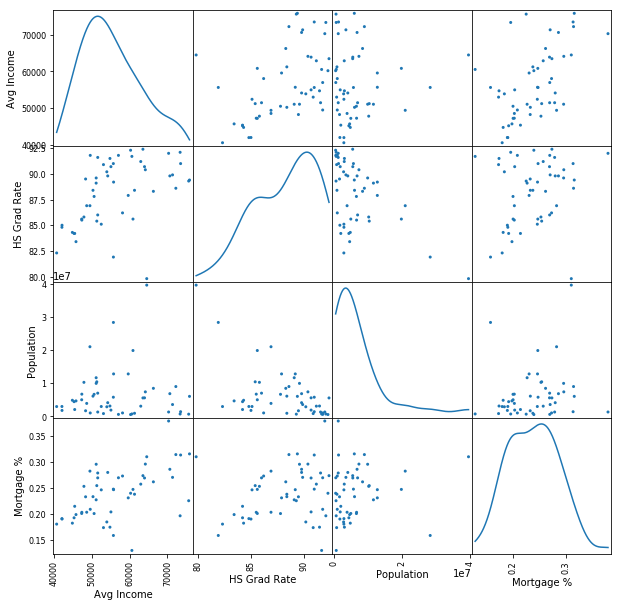

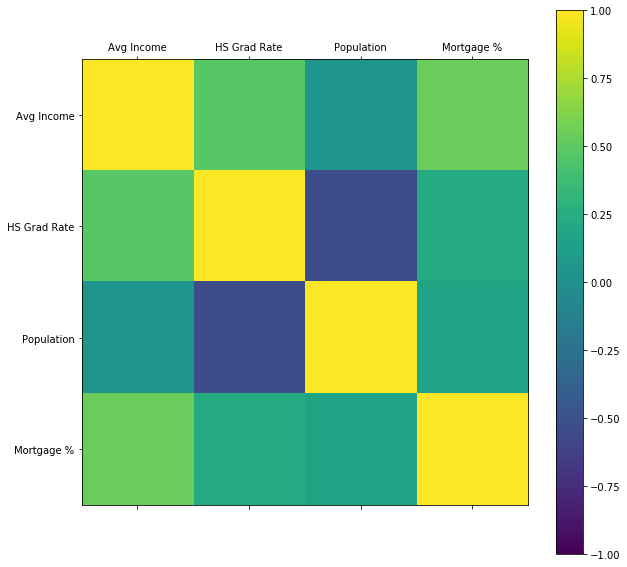

,Avg Income,HS Grad Rate,Population,Mortgage %
Avg Income,1.000000,0.479372,0.037928,0.540944
HS Grad Rate,0.479372,1.000000,-0.525405,0.231722
Population,0.037928,-0.525405,1.000000,0.170986
Mortgage %,0.540944,0.231722,0.170986,1.000000


In [22]:
scatter_matrix(df_corrm, alpha=1, figsize=(10, 10), diagonal='kde')

# Define correlations and columns
correlations_mortgage = df_corrm.corr()
columns_mortgage = ['Avg Income', 'HS Grad Rate', 'Population', 'Mortgage %']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations_mortgage, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_mortgage)
ax.set_yticklabels(columns_mortgage)
plt.show()
correlations_mortgage

### Figure 9: Visualizing effects on mortgage %
Here, mortgage % represents the % of complaints in a state that are related to mortgage. Something interesting shows up here. As we separate the data to be complaint type-specific, our correlations change significantly. Average income has an even greater effect on mortgage complaints, while high school graduation rate actually has a positive (though still minimal) effect rather than a negative one. The spreads in the scatter plot are also a bit less varied.

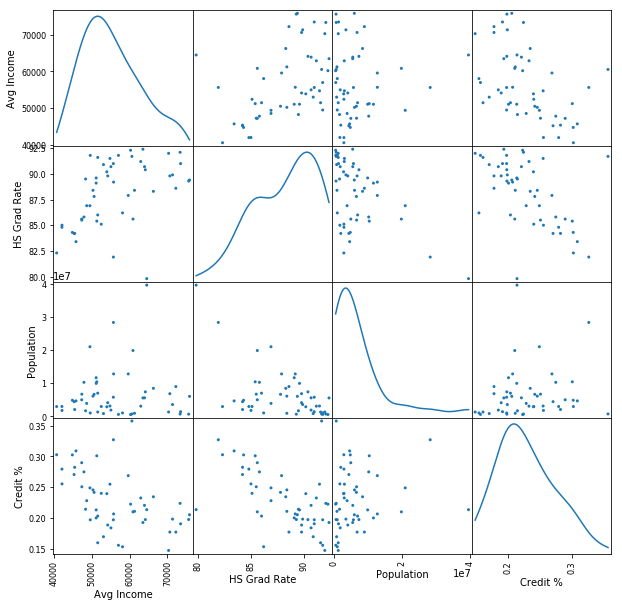

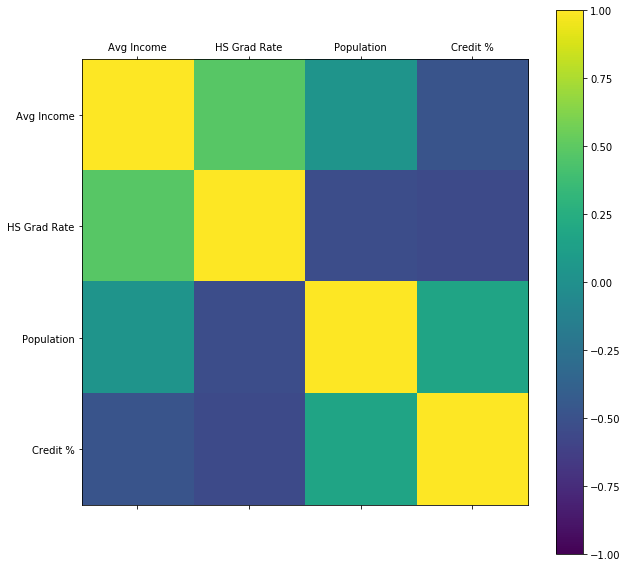

,Avg Income,HS Grad Rate,Population,Credit %
Avg Income,1.000000,0.479372,0.037928,-0.481427
HS Grad Rate,0.479372,1.000000,-0.525405,-0.547690
Population,0.037928,-0.525405,1.000000,0.167373
Credit %,-0.481427,-0.547690,0.167373,1.000000


In [23]:
# Correlation Matrix for Credit-Related Issues

# Preparation of Dataframe
df_ic = df_credit.copy()
df_ic.index = df_ic["State"]
df_ic = df_ic["Product"]

df_corrc = df_sm[['Avg Income', 'HS Grad Rate', 'Population']]
df_corrc.is_copy = False
df_corrc["Credit %"] = credit_counts

scatter_matrix(df_corrc, alpha=1, figsize=(10, 10), diagonal='kde')

# Define correlations and columns
correlations_credit = df_corrc.corr()
columns_credit = ['Avg Income', 'HS Grad Rate', 'Population', 'Credit %']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations_credit, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_credit)
ax.set_yticklabels(columns_credit)
plt.show()
correlations_credit

### Figure 13: Visualizing effects on credit %
Here, credit % represents the % of complaints in a state that are related to credit. This set of complaints most closely resembles our original hypothesis, as we see medium to strong negative correlations between average income/education and credit %. Our scatter plot also shows relatively clear correlations with far less variance.

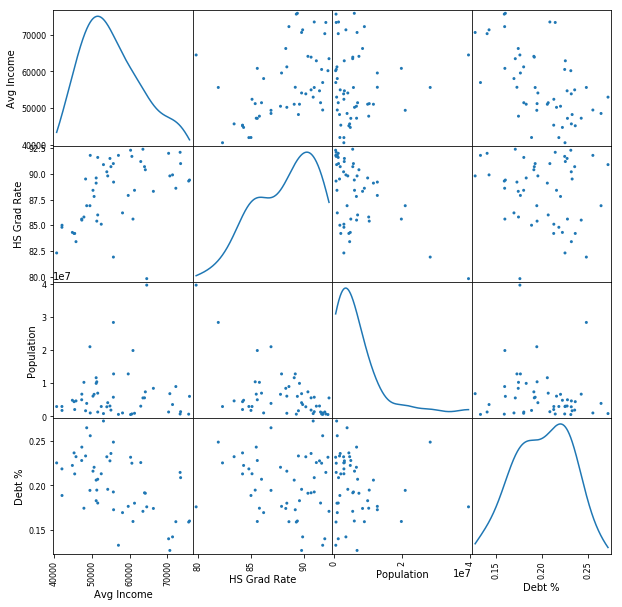

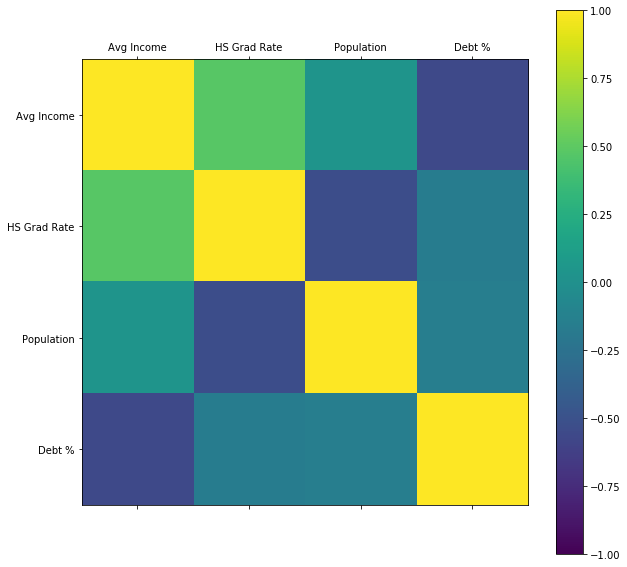

,Avg Income,HS Grad Rate,Population,Debt %
Avg Income,1.000000,0.479372,0.037928,-0.559205
HS Grad Rate,0.479372,1.000000,-0.525405,-0.156673
Population,0.037928,-0.525405,1.000000,-0.143637
Debt %,-0.559205,-0.156673,-0.143637,1.000000


In [24]:
# Correlation Matrix for Debt Issues

# Preparation of Dataframe
df_id = df_debt.copy()
df_id.index = df_id["State"]
df_id = df_id["Product"]

df_corrd = df_sm[['Avg Income', 'HS Grad Rate', 'Population']]
df_corrd.is_copy = False
df_corrd["Debt %"] = debt_counts

scatter_matrix(df_corrd, alpha=1, figsize=(10, 10), diagonal='kde')

# Define correlations and columns
correlations_debt = df_corrd.corr()
columns_debt = ['Avg Income', 'HS Grad Rate', 'Population', 'Debt %']

# Plot the correlation matrix
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(correlations_debt, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 4, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns_debt)
ax.set_yticklabels(columns_debt)
plt.show()
correlations_debt

### Figure 14: Visualizing effects on credit %
Here, credit % represents the % of complaints in a state that are related to credit. This set of complaints seems most affected by average income, which makes sense because obviously debt is a lack of income. What was interesting, though, was that it appears high school graduation rate really doesn't have that much effect on whether a person would go into debt (and subsequently make a complaint about it).

# Results and Discussion

Our results contradicted our original hypothesis statement. According to Figure 7 and 8, average income actually has a positive correlation with the amount of complaints made whilst high school graduation rate played almost no role. As such, <b>our original hypothesis is incorrect</b>. However, after branching out into specific complaint types (mortgage, credit, and debt complaints), we were able to find widely varying results. Figure 9 showed us that mortgage complaints were strongly correlated to a higher income. Figure 10 showed us that credit complaints were closest to our hypothesis, with lower average income and education strongly correlating to more complaints. Finally, Figure 11 showed us that debt had a strong negative correlation with average income and almost no correlation to high school graduation rate.

We originally began this project thinking we would be able to analyze why complaints were made and how they were affected by certain factors, but as we dug further into the project, it became more about finance. Debt complaints are obviously made more often when debt occurs more often. We ended up finding more about what factors affected mortgage rates, credit usage, and debt.

# Significance

The results of our research can be interpreted in a few ways, but most importantly, it is able to give insight on why some financial issues occur in the United States. Particularly, it is interesting seeing how strongly high school education negatively correlates with credit-related complaints, but has a very weak correlation with the other two complaint types we looked into.

In terms of solving the complaints, there is not much that we can gather from the data we've accumulated, mostly because we had to alter our course midway through the project because we saw a chance to further work our data and acquire more information. However, I believe that this project could pave the way towards a deeper understanding of financial issues within the US and how to deal with them.

# Potential Errors, Bias, and Limitations

* The data may reflect how customer service is biased towards certain individual identities. (race, ethnicity, gender identification, sexuality, etc.) 

* There could always be factors we do not consider that factor into the correlation. For instance, DC had an unusually high % of complaints for its population. Perhaps having such a small population had an underlying factor in its complaint count?

* Consumer Complaints, in this case, were limited to mostly very broad financial categories. It is possible that if the data we started with were grouped more specifically based on issue, we would've been able to see more clear correlations than the ones we found.